In [1]:
import pandas as pd
import polars as pl
import numpy as np
import os
from sklearn.model_selection import train_test_split
from nilm_pre_processing import NilmPreProcessing
from tqdm.notebook import tqdm
from utils import *
from nilm_dao import *

In [2]:
train_df = get_rae_data("train", False).to_pandas()
test_df = get_rae_data("test", False).to_pandas()
rae_label_encoder = get_label_encoder("rae")

In [3]:
train_df["Label"] = rae_label_encoder.inverse_transform(train_df["Label"])
test_df["Label"] = rae_label_encoder.inverse_transform(test_df["Label"])

# Ananlyze Power range

In [4]:
train_df.head()

,unix_ts,Irms,P,MeanPF,Q,S,Label
0,1462064304,0.9,78,0.702703,5,111,home_office
1,1462064305,1.7,179,0.864734,25,207,home_office
2,1462064306,1.7,180,0.857143,25,210,home_office
3,1462064307,1.8,194,0.889908,27,218,home_office
4,1462064308,1.8,197,0.895455,27,220,home_office


In [5]:
nilm_pp = NilmPreProcessing()

In [6]:
train_dict = count_labels(train_df["Label"])
train_dict

{'basement_blue_plugs': 301912,
 'bathrooms': 1369855,
 'clothes_dryer_s1': 30427,
 'clothes_dryer_s2': 54706,
 'clothes_washer': 44271,
 'fridge_s1': 2029157,
 'fridge_s2': 20017,
 'furnace_and_hot_water_unit': 4108399,
 'garage_sub_panel': 856,
 'heat_pump': 499987,
 'home_office': 1737034,
 'kitchen_counter_plugs': 37190,
 'kitchen_dishwasher': 143726,
 'kitchen_oven_s1': 16285,
 'kitchen_oven_s2': 5361,
 'kitchen_oven_s3': 2741,
 'lp16_s1': 633971,
 'lp20_s2': 9176,
 'lp320_s1': 962582,
 'lp3_s2': 20606,
 'misc_plugs': 189084,
 'rental_suite_sub_panel': 6119286,
 'upstairs_bedroom_AFCI_arc-fault_plugs': 2258671,
 'upstairs_plug_and_lights': 1462691}

In [7]:
test_dict = count_labels(test_df["Label"])
test_dict

{'basement_blue_plugs': 32976,
 'bathrooms': 150838,
 'clothes_dryer_s1': 3388,
 'clothes_dryer_s2': 6048,
 'clothes_washer': 4628,
 'fridge_s1': 223359,
 'fridge_s2': 2213,
 'furnace_and_hot_water_unit': 452325,
 'garage_sub_panel': 93,
 'heat_pump': 55375,
 'home_office': 192464,
 'kitchen_counter_plugs': 4037,
 'kitchen_dishwasher': 15869,
 'kitchen_oven_s1': 1804,
 'kitchen_oven_s2': 597,
 'kitchen_oven_s3': 306,
 'lp16_s1': 70312,
 'lp20_s2': 1018,
 'lp320_s1': 106739,
 'lp3_s2': 2287,
 'misc_plugs': 20914,
 'rental_suite_sub_panel': 676496,
 'upstairs_bedroom_AFCI_arc-fault_plugs': 248576,
 'upstairs_plug_and_lights': 162281}

273427


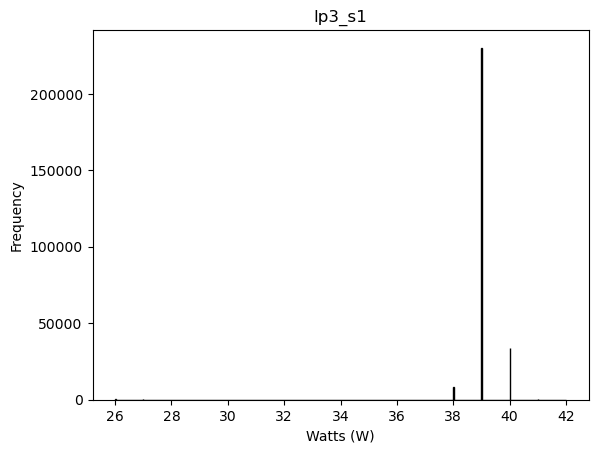

In [22]:
label_name = "lp3_s1"
data_df = train_df[train_df["Label"] == label_name]
print(len(data_df))
nilm_pp.plot_distribution(array=data_df["P"].to_numpy(), 
                          plot_name=label_name, 
                          unit_name="Watts (W)",
                          min=0,
                          max=None)

689155


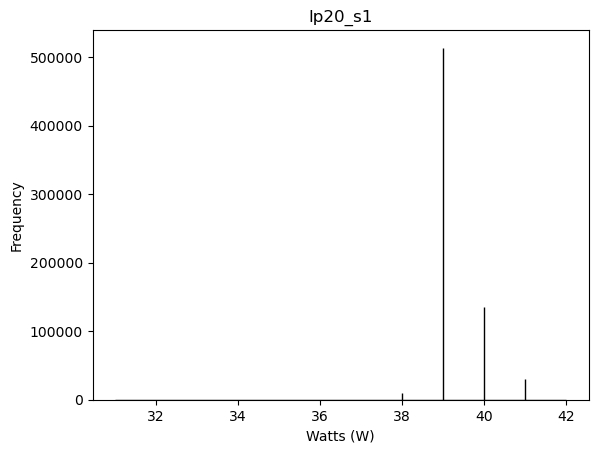

In [23]:
label_name = "lp20_s1"
data_df = train_df[train_df["Label"] == label_name]
print(len(data_df))
nilm_pp.plot_distribution(array=data_df["P"].to_numpy(), 
                          plot_name=label_name, 
                          unit_name="Watts (W)",
                          min=0,
                          max=None)

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

lp3_s1_df = train_df[train_df["Label"] == "lp3_s1"]
lp20_s1_df = train_df[train_df["Label"] == "lp20_s1"]
df = pd.concat([lp3_s1_df, lp20_s1_df])
df = df[["Irms", "P", "MeanPF", "S", "Q", "Label"]]
df.head()

,Irms,P,MeanPF,S,Q,Label
12798241,0.3,40,0.930233,43,13,lp3_s1
12798242,0.3,40,0.909091,44,13,lp3_s1
12798243,0.3,40,0.909091,44,13,lp3_s1
12798244,0.3,40,0.909091,44,13,lp3_s1
12798245,0.3,41,0.931818,44,13,lp3_s1


In [ ]:
sns.pairplot(df, hue="Label")
plt.rcParams.update({'font.size': 18})
plt.show()

# Encoding labels and scaling

In [3]:
train_df.head()

,unix_ts,Irms,P,MeanPF,Q,S,Label
0,1462064304,0.9,78,0.702703,5,111,home_office
1,1462064305,1.7,179,0.864734,25,207,home_office
2,1462064306,1.7,180,0.857143,25,210,home_office
3,1462064307,1.8,194,0.889908,27,218,home_office
4,1462064308,1.8,197,0.895455,27,220,home_office


In [4]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

label_encoder = LabelEncoder()
train_df["Label"] = label_encoder.fit_transform(train_df["Label"])
test_df["Label"] = label_encoder.transform(test_df["Label"])

In [5]:
train_df.head()

,unix_ts,Irms,P,MeanPF,Q,S,Label
0,1462064304,0.9,78,0.702703,5,111,11
1,1462064305,1.7,179,0.864734,25,207,11
2,1462064306,1.7,180,0.857143,25,210,11
3,1462064307,1.8,194,0.889908,27,218,11
4,1462064308,1.8,197,0.895455,27,220,11


In [6]:
np.save("/opt/nilm-shared-data/nilm_device_detection/RAE/utils/rae_classes.npy", label_encoder.classes_)

In [7]:
# Normalize data
scaler = StandardScaler()
scaled_train_df = train_df[['Irms', 'P', 'MeanPF', 'Q', 'S']].copy()
scaled_test_df = test_df[['Irms', 'P', 'MeanPF', 'Q', 'S']].copy()

scaled_train_df[['Irms', 'P', 'MeanPF', 'Q', 'S']] = scaler.fit_transform(scaled_train_df)
scaled_test_df[['Irms', 'P', 'MeanPF', 'Q', 'S']] = scaler.transform(scaled_test_df)

In [8]:
scaled_train_df.head()

,Irms,P,MeanPF,Q,S
0,-0.396080,-0.410506,-1.189226,-0.606768,-0.400193
1,-0.190371,-0.191241,0.132159,-0.300731,-0.192414
2,-0.190371,-0.189070,0.070250,-0.300731,-0.185921
3,-0.164658,-0.158677,0.337455,-0.270127,-0.168606
4,-0.164658,-0.152164,0.382685,-0.270127,-0.164278


In [9]:
scaled_test_df.head()

,Irms,P,MeanPF,Q,S
0,-0.010376,-0.002369,0.638550,-0.254825,-0.019265
1,-0.241799,-0.236831,0.007614,-0.331334,-0.237866
2,-0.241799,-0.239002,0.000978,-0.331334,-0.240030
3,-0.241799,-0.236831,0.007614,-0.331334,-0.237866
4,-0.216085,-0.230318,0.027101,-0.331334,-0.231373


In [10]:
from joblib import dump, load
dump(scaler, "/opt/nilm-shared-data/nilm_device_detection/RAE/utils/rae_scaler.joblib")

['/opt/nilm-shared-data/nilm_device_detection/RAE/utils/rae_scaler.joblib']

In [11]:
train_df.head()

,unix_ts,Irms,P,MeanPF,Q,S,Label
0,1462064304,0.9,78,0.702703,5,111,11
1,1462064305,1.7,179,0.864734,25,207,11
2,1462064306,1.7,180,0.857143,25,210,11
3,1462064307,1.8,194,0.889908,27,218,11
4,1462064308,1.8,197,0.895455,27,220,11


In [12]:
train_df.to_csv("/opt/nilm-shared-data/nilm_device_detection/RAE/train_test_data/train.csv", index=False)
test_df.to_csv("/opt/nilm-shared-data/nilm_device_detection/RAE/train_test_data/test.csv", index=False)